In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#改变plt里的默认设置
#改变默认字体
plt.rcParams['font.sans-serif'] = ['Simhei']
#改成黑体后编码的模式不改变
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv(r'D:\data\python\DataCastle2w\tap4fun\tap_fun_train.csv')
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [3]:
data.shape

(2288007, 109)

In [4]:
# 更换列名为中文
column_name = pd.read_excel(r'D:\data\python\DataCastle2w\tap4fun\tap4fun 数据字段解释.xlsx')
data.columns = column_name['字段解释']
data.head()

字段解释,玩家唯一ID,玩家注册时间,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, 玩家唯一ID to 45日付费金额
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

0

In [8]:
data['玩家唯一ID'].duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
玩家唯一ID,2288007.0,1.529543e+06,9.399393e+05,1.0,749992.5,1.419095e+06,2.299006e+06,3.190530e+06
木头获取数量,2288007.0,4.543069e+05,4.958667e+06,0.0,0.0,4.203800e+04,1.531180e+05,1.239962e+09
木头消耗数量,2288007.0,3.698433e+05,3.737720e+06,0.0,0.0,9.830000e+03,9.855700e+04,7.995875e+08
石头获取数量,2288007.0,1.897788e+05,4.670620e+06,0.0,0.0,0.000000e+00,0.000000e+00,1.214869e+09
石头消耗数量,2288007.0,1.376074e+05,3.370166e+06,0.0,0.0,0.000000e+00,0.000000e+00,7.962378e+08
...,...,...,...,...,...,...,...,...
PVE胜利次数,2288007.0,2.556749e+00,1.184737e+01,0.0,0.0,0.000000e+00,1.000000e+00,4.880000e+02
在线时长,2288007.0,1.020749e+01,3.895946e+01,0.0,0.5,1.833333e+00,4.833333e+00,2.049667e+03
付费金额,2288007.0,5.346691e-01,2.263835e+01,0.0,0.0,0.000000e+00,0.000000e+00,7.457950e+03


In [10]:
data[data['在线时长']>=20].describe()

字段解释,玩家唯一ID,木头获取数量,木头消耗数量,石头获取数量,石头消耗数量,象牙获取数量,象牙消耗数量,肉获取数量,肉消耗数量,魔法获取数量,...,PVP次数,主动发起PVP次数,PVP胜利次数,PVE次数,主动发起PVE次数,PVE胜利次数,在线时长,付费金额,付费次数,45日付费金额
count,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,1.833890e+05,...,183389.000000,183389.000000,183389.000000,183389.000000,183389.000000,183389.000000,183389.000000,183389.000000,183389.000000,183389.000000
mean,1.527198e+06,4.260508e+06,3.691250e+06,2.183026e+06,1.671178e+06,9.393008e+05,4.494473e+05,5.515476e+06,3.606677e+06,6.896384e+05,...,17.862287,10.872533,10.702779,28.706395,28.581305,25.877299,93.633065,6.529412,0.667243,21.940276
std,9.417592e+05,1.702583e+07,1.271037e+07,1.635870e+07,1.179293e+07,7.785467e+06,6.276128e+06,1.969295e+07,1.144896e+07,3.049877e+06,...,35.914296,29.761461,29.786834,35.769415,35.664140,33.776231,105.899468,79.680715,2.400483,310.814209
min,1.617000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,7.457400e+05,8.391720e+05,6.326900e+05,0.000000e+00,0.000000e+00,3.000000e+03,0.000000e+00,9.747930e+05,5.193580e+05,5.378100e+04,...,3.000000,0.000000,0.000000,5.000000,5.000000,4.000000,31.833333,0.000000,0.000000,0.000000
50%,1.418260e+06,1.919932e+06,1.639555e+06,2.000000e+05,0.000000e+00,3.000000e+04,0.000000e+00,2.579017e+06,1.570627e+06,1.800320e+05,...,8.000000,2.000000,2.000000,15.000000,15.000000,12.000000,55.000000,0.000000,0.000000,0.000000
75%,2.302023e+06,4.411091e+06,4.027713e+06,1.418334e+06,1.020406e+06,5.150000e+05,0.000000e+00,6.057070e+06,4.034940e+06,7.809050e+05,...,19.000000,9.000000,9.000000,38.000000,38.000000,34.000000,109.833333,0.000000,0.000000,0.000000
max,3.190518e+06,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,...,2054.000000,2051.000000,1904.000000,509.000000,509.000000,488.000000,2049.666667,7457.950000,105.000000,32977.810000


In [11]:
183389/data.shape[0]

0.08015228974386879

In [12]:
data.shape[0]

2288007

In [13]:
# 删除异常值
data.drop(data[data['建筑：要塞等级']==23].index,inplace = True)

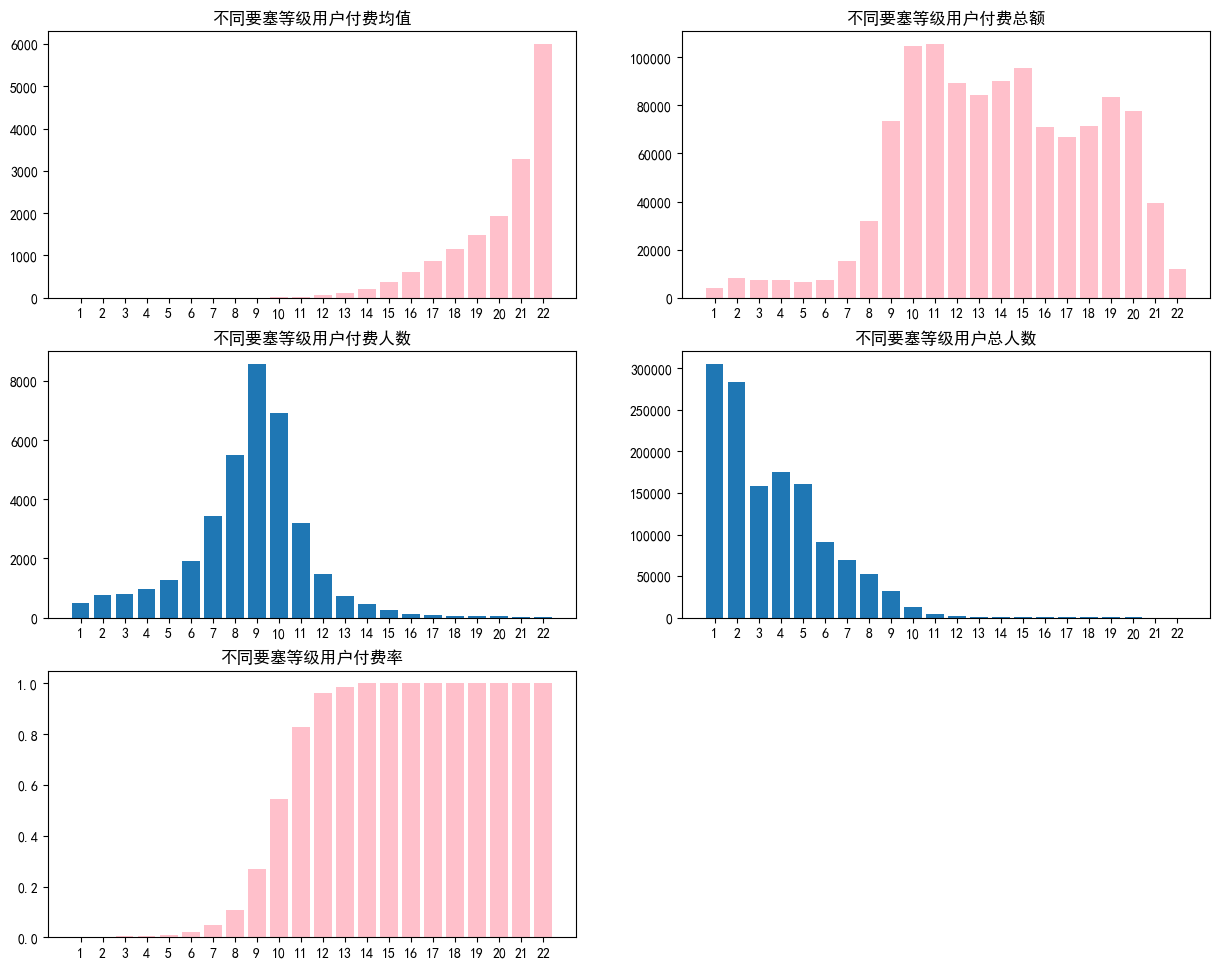

In [14]:
# 按照要塞等级对活跃玩家7日付费金额进行聚合平均计算
data1 = data[data['建筑：要塞等级']>0]
yaosai = data1['建筑：要塞等级']
data2 = data1[data1['付费金额']>0]
pay = data2['付费金额']
payMean = data1['付费金额'].groupby(yaosai).mean()
paySum = data1['付费金额'].groupby(yaosai).sum()
paycount = data2['付费金额'].groupby(yaosai).count()
personcount = data1['付费金额'].groupby(yaosai).count()
paypercent = paycount/personcount

plt.figure(figsize=(15,12),dpi=100)
plt.subplot(321)
plt.title('不同要塞等级用户付费均值')
plt.bar(payMean.index,payMean.values,color = 'pink')
plt.xticks(range(1,23,1))


plt.subplot(322)
plt.title('不同要塞等级用户付费总额')
plt.bar(paySum.index,paySum.values,color = 'pink')
plt.xticks(range(1,23,1))

plt.subplot(323)
# plt.figure(figsize=(15,6),dpi=100)
plt.title('不同要塞等级用户付费人数')
plt.bar(paycount.index,paycount.values)
plt.xticks(range(1,23,1))

plt.subplot(324)
# plt.figure(figsize=(15,6),dpi=100)
plt.title('不同要塞等级用户总人数')
plt.bar(personcount.index,personcount.values)
plt.xticks(range(1,23,1))

plt.subplot(325)
# plt.figure(figsize=(15,15),dpi=100)
plt.title('不同要塞等级用户付费率')
plt.bar(paypercent.index,paypercent.values,color = 'pink')
plt.xticks(range(1,23,1))
plt.show()

In [15]:
y = data.iloc[:,-1]#45日时的付费金额
SevenDayPayAmount = data.iloc[:,-3]#探索7日内经营状况

In [16]:
#对y进行分布探索
y.describe([0.75,0.90,0.95,0.97,0.99])

count    2.288006e+06
mean     1.790652e+00
std      8.838261e+01
min      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
90%      0.000000e+00
95%      0.000000e+00
97%      0.000000e+00
99%      3.970000e+00
max      3.297781e+04
Name: 45日付费金额, dtype: float64

In [17]:
data.shape[0]

2288006

In [18]:
# 展示7日与45日氪金情况的关键指标
def RevenueFocus(RevenueSeries):

    

    AllUsers = len(RevenueSeries)#全部用户
    PaidUsers = (RevenueSeries!=0).sum()#付费用户数
    TotalPayment = RevenueSeries.sum() #总付费金额
    ActiveUsers = data[data['在线时长']>=20].shape[0]

    print('付费率:{:.3f}%'.format(100*PaidUsers/ActiveUsers))
    print('付费人数:{}'.format(PaidUsers))
    print('转化总金额:{:.3f}'.format(TotalPayment))
    print('ARPU:{:.3f}'.format(TotalPayment/ActiveUsers))
    print('ARPPU:{:.3f}'.format(TotalPayment/PaidUsers))
    print('前500高氪用户金额占比:{:.3f}%'.format(100*RevenueSeries.sort_values(ascending=False)[:500].sum()/TotalPayment))
    print('前1000高氪用户金额占比:{:.3f}%'.format(100*RevenueSeries.sort_values(ascending=False)[:1000].sum()/TotalPayment))
    print('前5000高氪用户金额占比:{:.3f}%'.format(100*RevenueSeries.sort_values(ascending=False)[:5000].sum()/TotalPayment))

In [19]:
# 45日氪金情况
RevenueFocus(y)

付费率:25.076%
付费人数:45987
转化总金额:4097023.330
ARPU:22.341
ARPPU:89.091
前500高氪用户金额占比:51.590%
前1000高氪用户金额占比:64.848%
前5000高氪用户金额占比:89.362%


In [20]:
5000/data.shape[0]

0.0021853089546093846

In [21]:
#7日转化情况
RevenueFocus(SevenDayPayAmount)

付费率:22.596%
付费人数:41438
转化总金额:1220176.300
ARPU:6.654
ARPPU:29.446
前500高氪用户金额占比:45.103%
前1000高氪用户金额占比:57.138%
前5000高氪用户金额占比:82.961%


In [22]:
#7-45日新增氪金用户
45988 - 41439

4549

In [23]:
#前7天没有氪金的用户
(SevenDayPayAmount == 0).sum()

2246568

In [24]:
#7-45日新增氪金玩家/前7天没有氪金的玩家(%)
100*(45988 - 41439)/((SevenDayPayAmount == 0).sum())

0.2024866373953515

In [25]:
#7日氪金了之后再也没有氪金的玩家：
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount!=0].count()

30130

In [26]:
# 占前7日氪金玩家人数的占比
100*30130/((SevenDayPayAmount!=0).sum())

72.71103817751822

In [27]:
#7日后再也没有付过费的用户前七日的氪金情况
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount!=0].describe()

count    30130.000000
mean        11.407407
std         71.134875
min          0.990000
25%          0.990000
50%          1.980000
75%          5.980000
max       4086.520000
Name: 付费金额, dtype: float64

In [28]:
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount!=0].sum()

343705.17000000004

In [29]:
#7日后继续付费的用户前7日的氪金情况
SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount!=0].describe()

count    11308.000000
mean        77.508943
std        288.178095
min          0.990000
25%          2.980000
50%         15.970000
75%         45.940000
max       7457.950000
Name: 付费金额, dtype: float64

In [30]:
SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount!=0].sum()

876471.1299999999

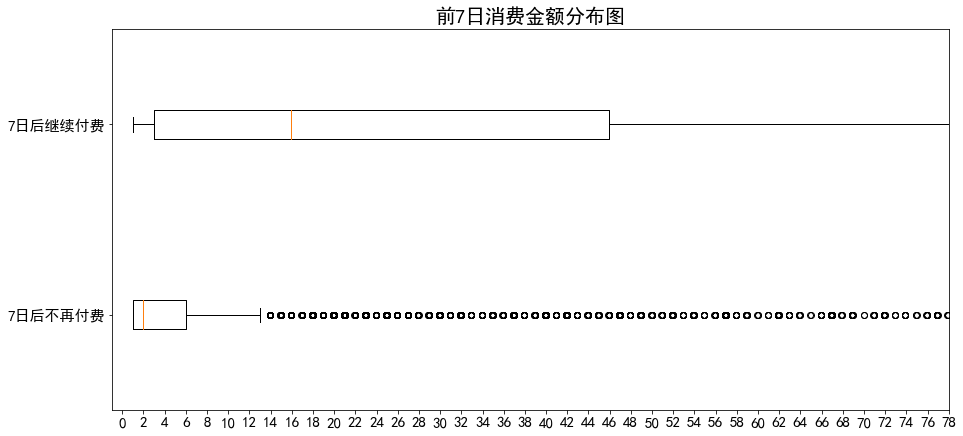

In [31]:
# 两类用户在前7日的氪金情况
plt.figure(figsize=(15,7))
plt.boxplot([SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount!=0]
            ,SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount!=0]]
            ,labels=['7日后不再付费','7日后继续付费']
            ,vert=False#是否垂直摆放
           )
plt.xlim(-1,50)
plt.title('前7日消费金额分布图',fontsize=20)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,80,2),fontsize=15.0)
plt.show()

In [32]:
PotentialPoints = range(1,16)
for i in PotentialPoints:
    #取出所有7天内付费金额超过i的付费用户
    HighThanPoint = SevenDayPayAmount[SevenDayPayAmount>=i]
    #这些用户7天后继续付费的比例
    KeepPaid = len(HighThanPoint[SevenDayPayAmount!=y])/len(HighThanPoint)
    #这些用户停止付费的比例
    StopPaid = len(HighThanPoint[SevenDayPayAmount==y])/len(HighThanPoint)
    print(i)
    print('{:.3f}%'.format(100*KeepPaid))
    print('{:.3f}%'.format(100*StopPaid))
    print('{:.3f}%'.format(KeepPaid-StopPaid))
    if KeepPaid - StopPaid > 0:
        print('当7日内付费金额大于{:.2f}时，用户继续氪金的可能性比不再氪金的可能性更高！'.format(i))
        break

1
37.681%
62.319%
-0.246%
2
43.717%
56.283%
-0.126%
3
45.756%
54.244%
-0.085%
4
46.529%
53.471%
-0.069%
5
48.091%
51.909%
-0.038%
6
50.775%
49.225%
0.015%
当7日内付费金额大于6.00时，用户继续氪金的可能性比不再氪金的可能性更高！


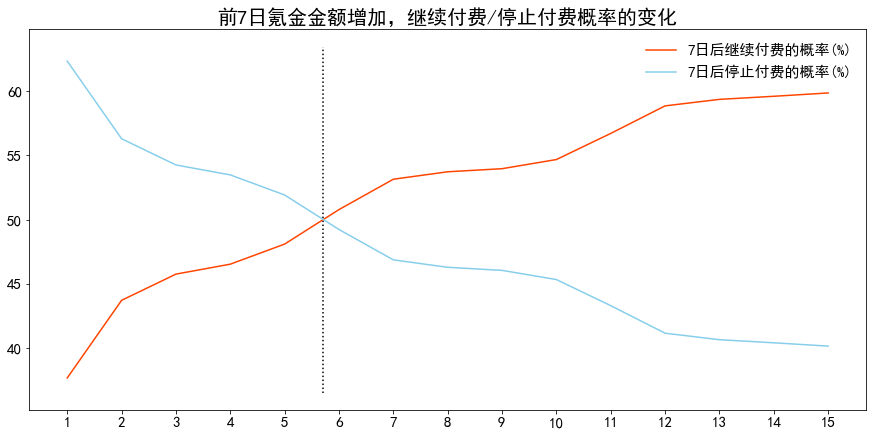

In [33]:
# 用图像呈现
KeepPaidList = []
StopPaidList = []
for i in PotentialPoints:
    #取出所有7天内付费金额超过i的付费用户
    HighThanPoint = SevenDayPayAmount[SevenDayPayAmount>=i]
    #这些用户7天后继续付费的比例
    KeepPaid = len(HighThanPoint[SevenDayPayAmount!=y])/len(HighThanPoint)
    #这些用户停止付费的比例
    StopPaid = len(HighThanPoint[SevenDayPayAmount==y])/len(HighThanPoint)
    KeepPaidList.append(100*KeepPaid)
    StopPaidList.append(100*StopPaid)
    
plt.figure(figsize=(15,7))
plt.plot(PotentialPoints,KeepPaidList,label='7日后继续付费的概率(%)',color='orangered')
plt.plot(PotentialPoints,StopPaidList,label='7日后停止付费的概率(%)',color='skyblue')
# plt.xlim(-1,50)
plt.title('前7日氪金金额增加，继续付费/停止付费概率的变化',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(range(0,16,1),fontsize=15)
plt.legend(fontsize=15,frameon=False)
plt.vlines(5.7,ymin=plt.ylim()[0]+0.1,ymax=plt.ylim()[1]-0.1,colors='black',linestyles='dotted')
plt.show()

In [34]:
# 45日转化情况
RevenueFocus(y)

付费率:25.076%
付费人数:45987
转化总金额:4097023.330
ARPU:22.341
ARPPU:89.091
前500高氪用户金额占比:51.590%
前1000高氪用户金额占比:64.848%
前5000高氪用户金额占比:89.362%


In [35]:
#7日转化情况
RevenueFocus(SevenDayPayAmount)

付费率:22.596%
付费人数:41438
转化总金额:1220176.300
ARPU:6.654
ARPPU:29.446
前500高氪用户金额占比:45.103%
前1000高氪用户金额占比:57.138%
前5000高氪用户金额占比:82.961%


In [36]:
PlayTime = data.loc[:,'在线时长']
PlayTime.max()

2049.666667

In [37]:
# pandas属性设置—设置不显示科学计数法
pd.set_option('display.float_format',lambda x : '{:.3f}'.format(x))
PlayTime.describe()

count   2288006.000
mean         10.207
std          38.959
min           0.000
25%           0.500
50%           1.833
75%           4.833
max        2049.667
Name: 在线时长, dtype: float64

In [38]:
# 查看一下90%以上的分布
PlayTime.describe([0.75,0.9,0.95,0.99])

count   2288006.000
mean         10.207
std          38.959
min           0.000
50%           1.833
75%           4.833
90%          15.000
95%          41.333
99%         183.500
max        2049.667
Name: 在线时长, dtype: float64

In [39]:
RegisterDate = data.loc[:,'玩家注册时间'].apply(lambda x:x[:10])
RegisterDate

0          2018-02-02
1          2018-01-26
2          2018-01-26
3          2018-01-26
4          2018-01-26
              ...    
2288002    2018-02-03
2288003    2018-02-03
2288004    2018-02-03
2288005    2018-02-03
2288006    2018-02-03
Name: 玩家注册时间, Length: 2288006, dtype: object

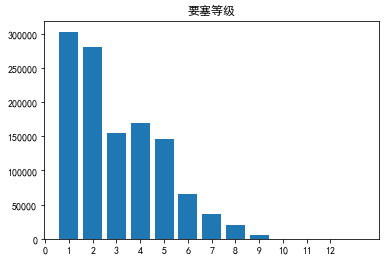

In [40]:
Q = data.loc[(data['在线时长']<20)&(data['建筑：要塞等级']>0),'建筑：要塞等级'].groupby(data['建筑：要塞等级']).count()
plt.bar(Q.index,Q.values)
plt.xticks(range(0,13))
plt.title('要塞等级')
plt.show()

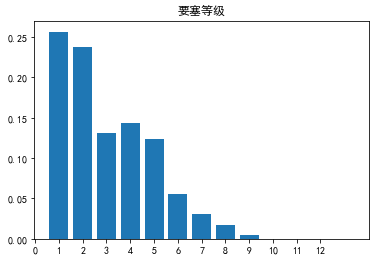

In [41]:
Z = data.loc[(data['在线时长']<20)&(data['建筑：要塞等级']>0),'建筑：要塞等级'].groupby(data['建筑：要塞等级']).count()/(data.loc[(data['在线时长']<20)&(data['建筑：要塞等级']>0),'建筑：要塞等级']).count()
plt.bar(Z.index,Z.values)
plt.xticks(range(0,13))
plt.title('要塞等级')
plt.show()

In [42]:
Z

建筑：要塞等级
1    0.256
2    0.237
3    0.131
4    0.144
5    0.124
6    0.055
7    0.030
8    0.017
9    0.005
10   0.000
11   0.000
12   0.000
13   0.000
Name: 建筑：要塞等级, dtype: float64

<AxesSubplot:xlabel='在线时长', ylabel='Count'>

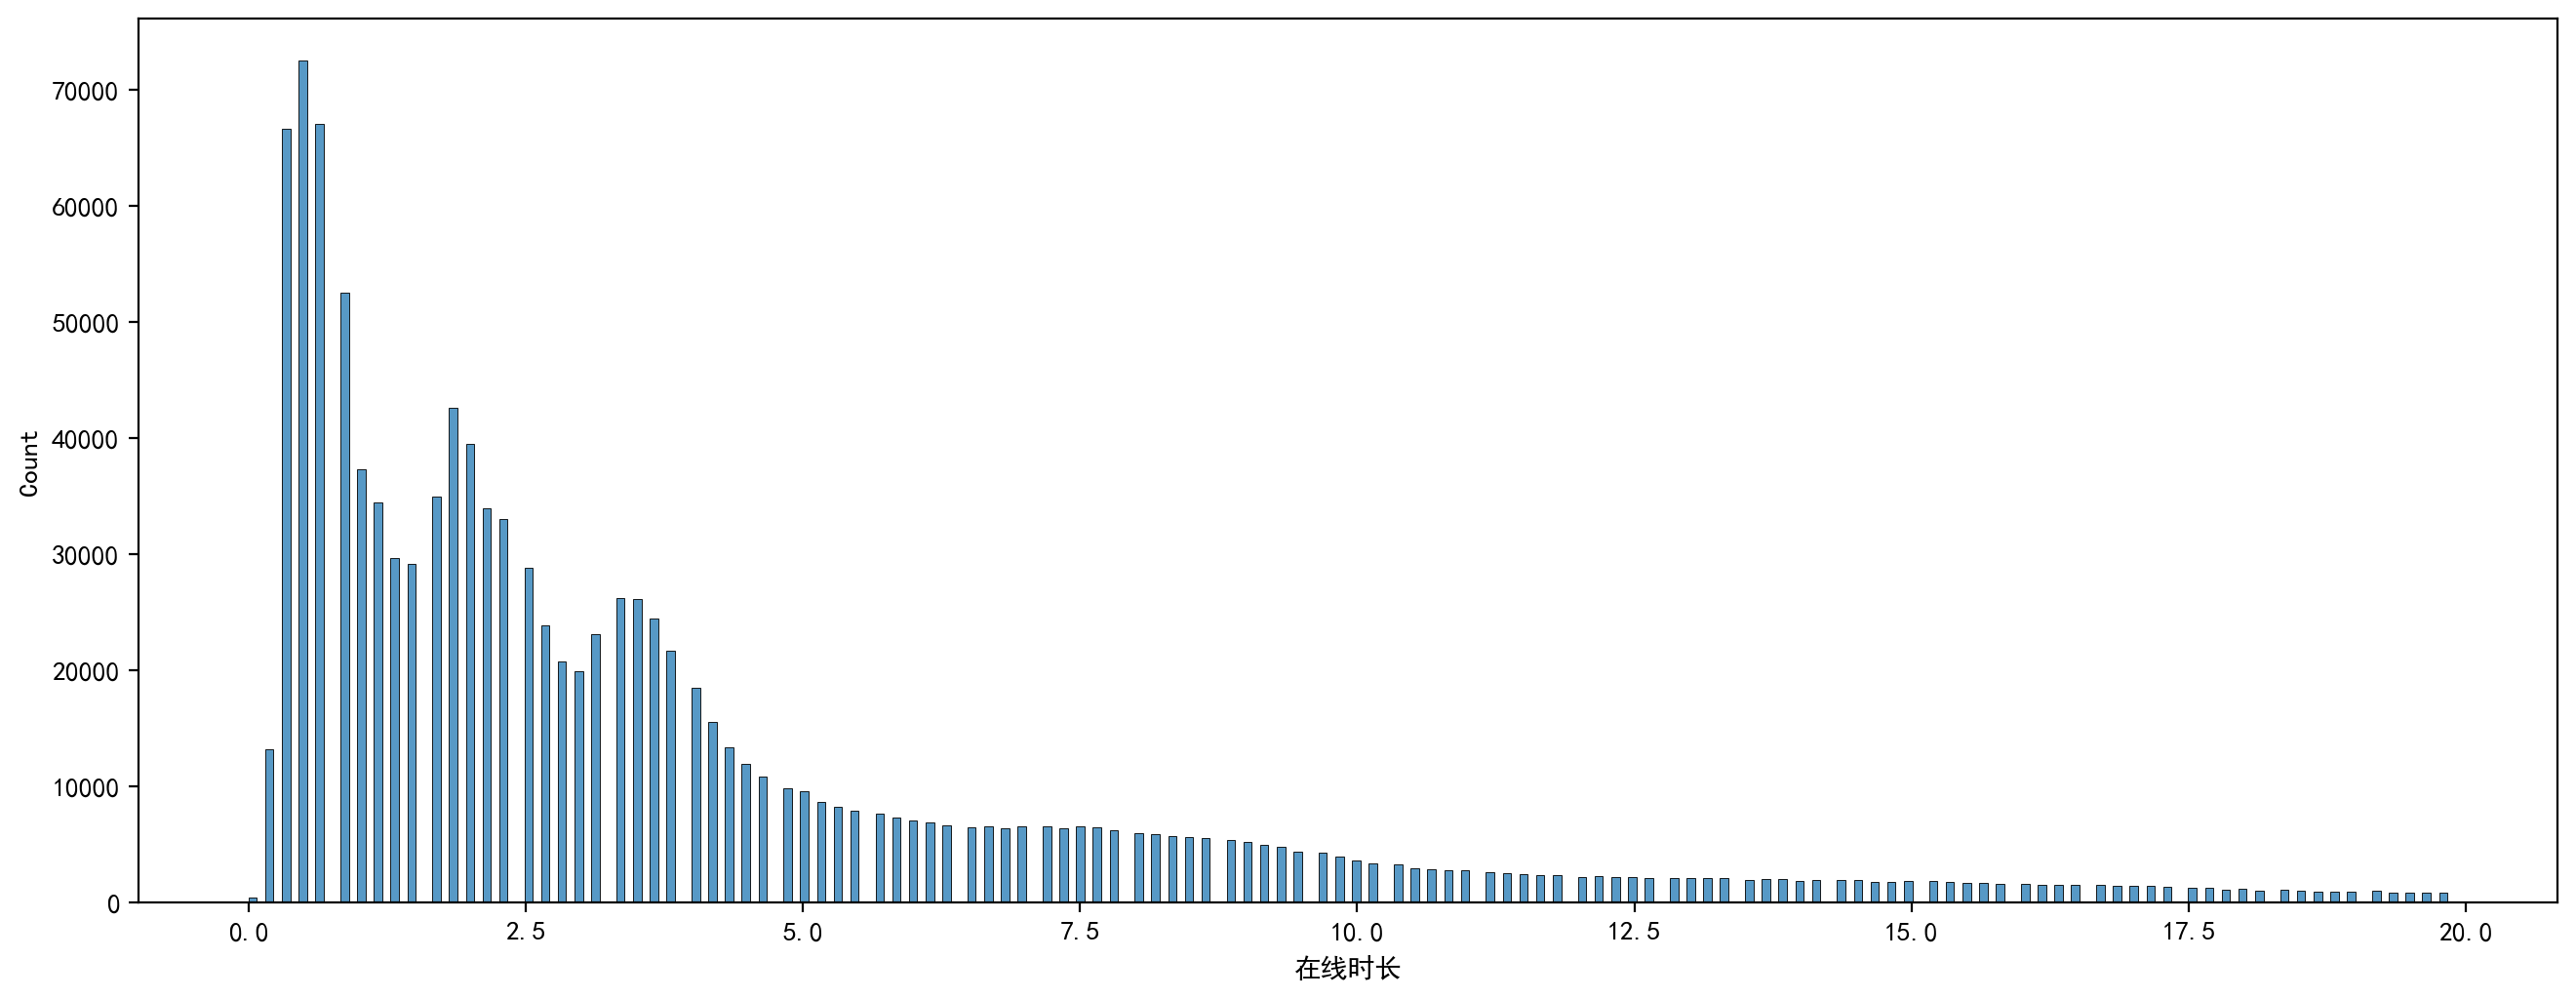

In [43]:
import seaborn as sns
plt.figure(figsize=(16, 6), dpi=200)
sns.histplot(data.loc[(data['在线时长']<20)&(data['建筑：要塞等级']>0),'在线时长']) 

In [44]:
PaidPlayTime = data.loc[data['付费金额']!=0,'在线时长']
PaidPlayTime.describe().T

count   41438.000
mean      140.182
std       149.970
min         0.000
25%        33.000
50%        88.833
75%       194.667
max      1674.667
Name: 在线时长, dtype: float64

一周在线时长不足1分钟
	45日平均消费额为0.022,45日总消费额为18323.490元
	7日平均消费额为0.001,7日总消费额为574.180元
	7日氪金占比0.047%,45日氪金占比0.447%
一周在线时长不足5分钟
	45日平均消费额为0.019,45日总消费额为32572.700元
	7日平均消费额为0.003,7日总消费额为4519.280元
	7日氪金占比0.370%,45日氪金占比0.795%


<ipython-input-45-bfecc245254c>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-45-bfecc245254c>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)
<ipython-input-45-bfecc245254c>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

一周在线时长不足10分钟
	45日平均消费额为0.023,45日总消费额为44527.180元
	7日平均消费额为0.006,7日总消费额为11151.310元
	7日氪金占比0.914%,45日氪金占比1.087%
一周在线时长不足15分钟
	45日平均消费额为0.028,45日总消费额为57753.190元
	7日平均消费额为0.009,7日总消费额为18428.260元
	7日氪金占比1.510%,45日氪金占比1.410%


<ipython-input-45-bfecc245254c>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-45-bfecc245254c>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)
<ipython-input-45-bfecc245254c>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

一周在线时长不足20分钟
	45日平均消费额为0.038,45日总消费额为79124.920元
	7日平均消费额为0.012,7日总消费额为25904.310元
	7日氪金占比2.123%,45日氪金占比1.931%
一周在线时长不足25分钟
	45日平均消费额为0.044,45日总消费额为94650.110元
	7日平均消费额为0.016,7日总消费额为34217.390元
	7日氪金占比2.804%,45日氪金占比2.310%


<ipython-input-45-bfecc245254c>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)
<ipython-input-45-bfecc245254c>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-45-bfecc245254c>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

一周在线时长不足30分钟
	45日平均消费额为0.050,45日总消费额为107763.140元
	7日平均消费额为0.019,7日总消费额为40862.200元
	7日氪金占比3.349%,45日氪金占比2.630%


<ipython-input-45-bfecc245254c>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-45-bfecc245254c>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


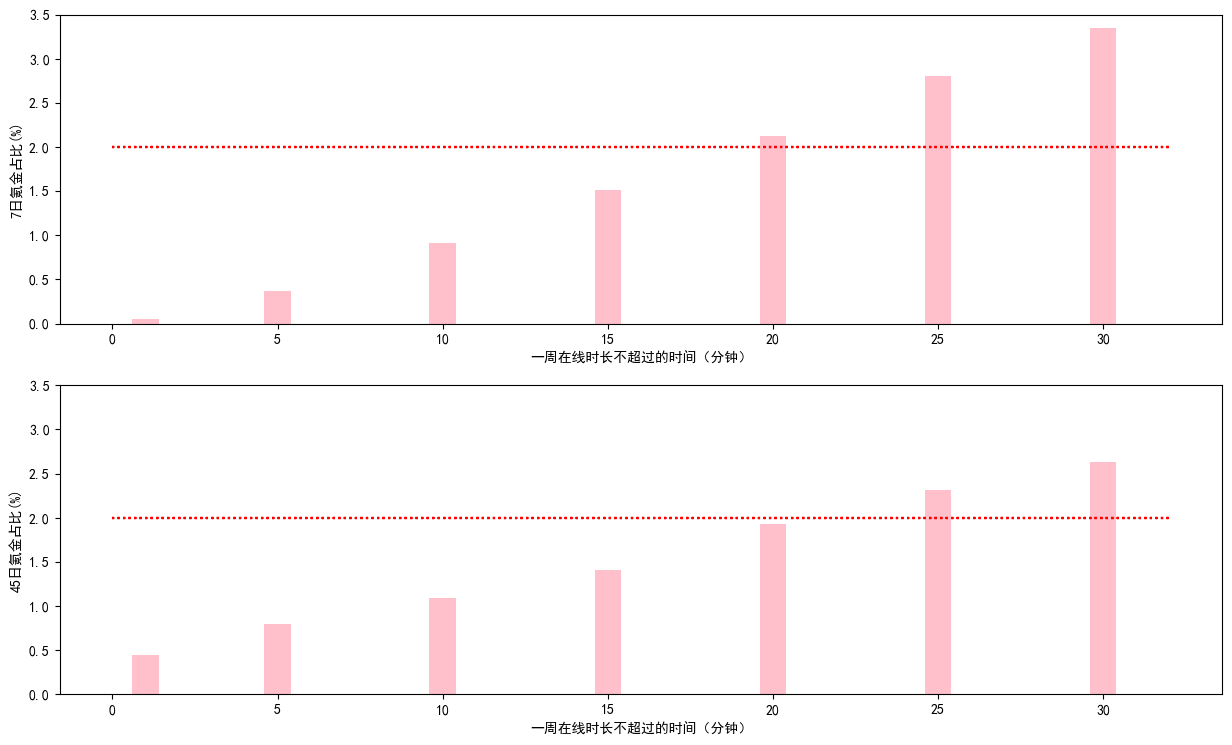

In [45]:
# 在线时长很少的玩家们贡献的氪金数额
plt.figure(figsize=(15,9),dpi=100)
for playtime in [1,5,10,15,20,25,30]:
    
    MeanPay45 = data.loc[data['在线时长']<playtime,'45日付费金额'].mean()
    TotalPay45 = data.loc[data['在线时长']<playtime,'45日付费金额'].sum()
    MeanPay7 = data.loc[data['在线时长']<playtime,'付费金额'].mean()
    TotalPay7 = data.loc[data['在线时长']<playtime,'付费金额'].sum()
    
    print('一周在线时长不足{}分钟'.format(playtime))
    print('\t45日平均消费额为{:.3f},45日总消费额为{:.3f}元'.format(MeanPay45,TotalPay45))
    print('\t7日平均消费额为{:.3f},7日总消费额为{:.3f}元'.format(MeanPay7,TotalPay7))
    print('\t7日氪金占比{:.3f}%,45日氪金占比{:.3f}%'.format(100*TotalPay7/(data['付费金额'].sum())
                                                            ,100*TotalPay45/(data['45日付费金额'].sum())))
    
    
    plt.subplot(211)
    plt.bar(playtime,100*TotalPay7/(data['付费金额'].sum()),color='pink')
    plt.xlabel('一周在线时长不超过的时间（分钟）')
    plt.ylabel('7日氪金占比(%)')
    plt.hlines(2,0,32,colors='red',linestyles='dotted')
    plt.ylim(0,3.5)
    plt.subplot(212)
    plt.bar(playtime,100*TotalPay45/(data['45日付费金额'].sum()),color='pink')
    plt.xlabel('一周在线时长不超过的时间（分钟）')
    plt.ylabel('45日氪金占比(%)')
    plt.hlines(2,0,32,colors='red',linestyles='dotted')
    plt.ylim(0,3.5)
plt.show()

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
字段解释,,,,,,,,
玩家唯一ID,2288006.000,1529543.353,939939.459,1.000,749992.250,1419094.500,2299006.750,3190530.000
木头获取数量,2288006.000,453778.536,4893848.083,0.000,0.000,42038.000,153118.000,1239962311.000
木头消耗数量,2288006.000,369532.509,3708048.725,0.000,0.000,9830.000,98557.000,799587506.000
石头获取数量,2288006.000,189268.261,4606342.087,0.000,0.000,0.000,0.000,1214869437.000
石头消耗数量,2288006.000,137308.307,3339670.633,0.000,0.000,0.000,0.000,796237770.000
...,...,...,...,...,...,...,...,...
PVE胜利次数,2288006.000,2.557,11.847,0.000,0.000,0.000,1.000,488.000
在线时长,2288006.000,10.207,38.959,0.000,0.500,1.833,4.833,2049.667
付费金额,2288006.000,0.533,22.542,0.000,0.000,0.000,0.000,7457.950


In [47]:
# 资源使用情况
dataA = data[(data['在线时长']>=20)&(data['建筑：要塞等级']>=10)]
dataB = data[(data['在线时长']>=20)&(data['建筑：要塞等级']<10)]
A1 = dataA[dataA['付费金额']!=0]#高端付费用户
A2 = dataA[dataA['付费金额']==0]#高端免费用户
B1 = dataB[dataB['付费金额']!=0]#普通活跃付费用户
B2 = dataB[dataB['付费金额']==0]#普通活跃免费用户

In [48]:
mutoup = []
shitoup = []
roup = []
mofap = []
xiangyap = []
for i in [A1,A2,B1,B2]:
        mutoup.append(i['木头消耗数量'].sum()/i['木头获取数量'].sum())
        shitoup.append(i['肉消耗数量'].sum()/i['肉获取数量'].sum())
        roup.append(i['石头消耗数量'].sum()/i['石头获取数量'].sum())
        mofap.append(i['魔法消耗数量'].sum()/i['魔法获取数量'].sum())
        xiangyap.append(i['象牙消耗数量'].sum()/i['象牙获取数量'].sum())
ziyuanp = pd.concat([pd.DataFrame(mutoup),pd.DataFrame(roup),pd.DataFrame(shitoup),pd.DataFrame(mofap),pd.DataFrame(xiangyap)],axis=1)
ziyuanp.columns = ['木头使用率','肉使用率','石头使用率','魔法使用率','象牙使用率']
ziyuanp

,木头使用率,肉使用率,石头使用率,魔法使用率,象牙使用率
0,0.851,0.801,0.652,0.738,0.647
1,0.928,0.886,0.724,0.604,0.248
2,0.837,0.634,0.593,0.682,0.108
3,0.885,0.691,0.669,0.710,0.022


In [49]:
tongyong = []
keyan = []
jianzhu = []
xunlian = []
zhiliao = []
for i in [A1,A2,B1,B2]:
        tongyong.append(i['通用加速使用数量'].sum()/i['通用加速获取数量'].sum())
        keyan.append(i['科研加速使用数量'].sum()/i['科研加速获取数量'].sum())
        jianzhu.append(i['建筑加速使用数量'].sum()/i['建筑加速获取数量'].sum())
        xunlian.append(i['训练加速使用数量'].sum()/i['训练加速获取数量'].sum())
        zhiliao.append(i['治疗加速使用数量'].sum()/i['治疗加速获取数量'].sum())

jiasu = pd.concat([pd.DataFrame(tongyong),pd.DataFrame(keyan),pd.DataFrame(jianzhu),pd.DataFrame(xunlian),pd.DataFrame(zhiliao)],axis=1)
jiasu.columns = ['通用加速使用率','科研加速使用率','建筑加速使用率','训练加速使用率','治疗加速使用率']
jiasu

,通用加速使用率,科研加速使用率,建筑加速使用率,训练加速使用率,治疗加速使用率
0,0.825,0.831,0.927,0.727,0.136
1,0.780,0.683,0.854,0.523,0.050
2,0.570,0.545,0.682,0.386,0.037
3,0.593,0.475,0.724,0.296,0.007


In [50]:
PVP = []
PVPV = []
PVE = []
PVEV = []

for i in [A1,A2,B1,B2]:
        PVP.append(i['主动发起PVP次数'].sum()/i['PVP次数'].sum())
        PVPV.append(i['PVP胜利次数'].sum()/i['PVP次数'].sum())
        PVE.append(i['主动发起PVE次数'].sum()/i['PVE次数'].sum())
        PVEV.append(i['PVE胜利次数'].sum()/i['PVE次数'].sum())
PV = pd.concat([pd.DataFrame(PVP),pd.DataFrame(PVPV),pd.DataFrame(PVE),pd.DataFrame(PVEV)],axis=1)
PV.columns = ['PVP主动发起率','PVP胜率','PVE主动发起率','PVE胜率']
PV

,PVP主动发起率,PVP胜率,PVE主动发起率,PVE胜率
0,0.753,0.806,0.993,0.919
1,0.744,0.780,0.992,0.932
2,0.596,0.618,0.997,0.906
3,0.545,0.503,0.997,0.890


In [51]:
#异常值
NumOfSamples = data.shape[0]
abnormal = pd.DataFrame()
DataNoAbnormal = data.copy()
BoxAbnormalIdx = [] #保存异常值的索引
for idx,column in enumerate(data.columns[2:-1]):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQU = QU - QL
    ab = feature[((feature < (QL - 1.5*IQU)).astype(int) + (feature > (QU+1.5*IQU)).astype(int))!=0]
    BoxAbnormalIdx.extend(ab.index)
    abnormal.loc[idx,'特征'] = column
    abnormal.loc[idx,'异常值数量'] = ab.shape[0]
    abnormal.loc[idx,'异常值比例'] = '{:.3f}%'.format(ab.shape[0]*100/NumOfSamples)

In [52]:
# 去重
BoxAbnormalIdx=set(BoxAbnormalIdx)
len(BoxAbnormalIdx)

1123705

In [53]:
# 异常用户中前7日付费用户的数量
(data.loc[BoxAbnormalIdx,'付费金额']!=0).sum()

41438

In [54]:
# 前7日所有付费用户的数量
(data.loc[:,'付费金额']!=0).sum()

41438

In [55]:
# 前45日所有付费用户的数量
(data.loc[:,'45日付费金额']!=0).sum()

45987

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False

In [57]:
import time
import datetime

In [58]:
RegisterDate = data.loc[:,'玩家注册时间'].apply(lambda x:x[:10])

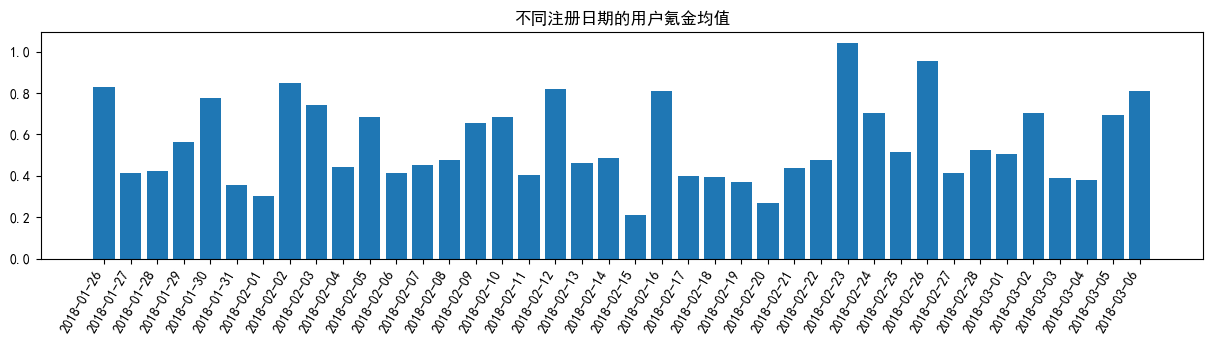

In [59]:
# 按照玩家注册日期对氪金玩家7日付费金额进行聚合平均计算
RegisterDateMean = data['付费金额'].groupby(RegisterDate).mean()
plt.figure(figsize=(15,3),dpi=100)
plt.title('不同注册日期的用户氪金均值')
plt.bar(RegisterDateMean.index,RegisterDateMean.values)
plt.xticks(RegisterDateMean.index,rotation=60,ha='right')
plt.show()

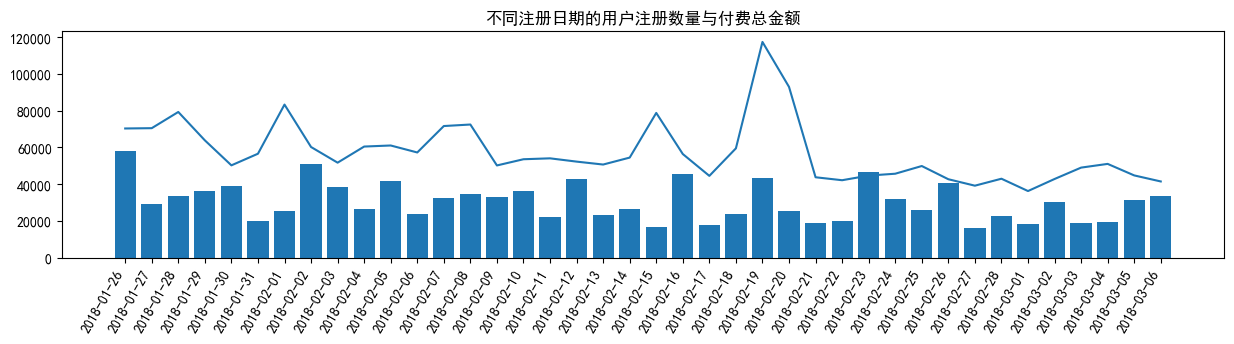

In [60]:
# 按照玩家注册日期对氪金玩家7日付费金额进行聚合
RegisterDateSum = data['付费金额'].groupby(RegisterDate).sum()
RegisterDatePlaySum = data['付费金额'].groupby(RegisterDate).count()
#绘制图像
plt.figure(figsize=(15,3),dpi=100)
plt.plot(RegisterDatePlaySum.index,RegisterDatePlaySum.values)

plt.title('不同注册日期的用户注册数量与付费总金额')
plt.bar(RegisterDateSum.index,RegisterDateSum.values)
plt.xticks(RegisterDateSum.index,rotation=60,ha='right')
plt.show()

In [61]:
RegisterWeekDay = data.loc[:,'玩家注册时间'].apply(lambda x : datetime.datetime.strptime(x[:10],'%Y-%m-%d').weekday()+1)

In [62]:
RegisterWeekDayMean = data['付费金额'].groupby(RegisterWeekDay).mean()

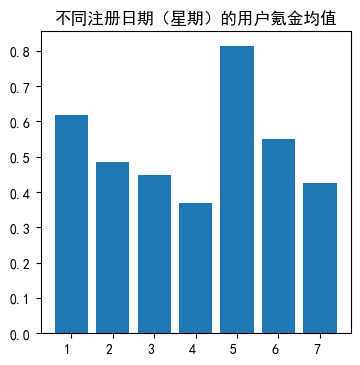

In [63]:
plt.figure(figsize=(4,4),dpi=100)
plt.title('不同注册日期（星期）的用户氪金均值')
plt.bar(RegisterWeekDayMean.index,RegisterWeekDayMean.values)
plt.xticks(RegisterWeekDayMean.index,ha='right')
plt.show()

In [64]:
pd.concat([data['45日付费金额'],RegisterWeekDay],axis=1).corr()

,45日付费金额,玩家注册时间
45日付费金额,1.000,0.000
玩家注册时间,0.000,1.000


In [65]:
# 提取小时作为特征
RegisterTime = data.loc[:,'玩家注册时间'].apply(lambda x : int(x[11:13]))
RegisterTime

0          19
1           0
2           0
3           0
4           0
           ..
2288002    14
2288003    14
2288004    14
2288005    14
2288006    14
Name: 玩家注册时间, Length: 2288006, dtype: int64

In [66]:
RegisterTimeMean = data['付费金额'].groupby(RegisterTime).mean()

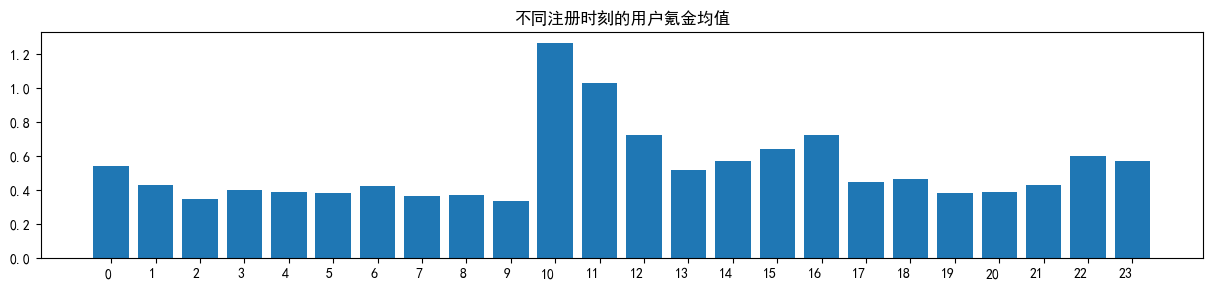

In [67]:
plt.figure(figsize=(15,3),dpi=100)
plt.title('不同注册时刻的用户氪金均值')
plt.bar(RegisterTimeMean.index,RegisterTimeMean.values)
plt.xticks(RegisterTimeMean.index,ha='right')
plt.show()

In [68]:
pd.concat([data['45日付费金额'],RegisterTime],axis=1).corr()

,45日付费金额,玩家注册时间
45日付费金额,1.000,0.001
玩家注册时间,0.001,1.000


In [69]:
# 修改特征
# 增加'玩家注册时刻(小时)'列
data.insert(data.shape[1]-1,'玩家注册时刻',RegisterTime)
# 删除玩家ID列，不是有助于建模的特征
data.drop(columns=['玩家注册时间','玩家唯一ID'],inplace=True)

In [70]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [71]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as TTS 
from sklearn.metrics import mean_squared_error as MSE

In [72]:
#数据集分割
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=1412)

In [73]:
#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [74]:
reg = LR()
reg_benchmark = reg.fit(Xtrain,Ytrain)

In [75]:
reg_benchmark.score(Xtrain,Ytrain)

0.6091059703706903

In [76]:
reg_benchmark.score(Xtest,Ytest)

0.4485863822206694

In [77]:
#测试集上的预测标签
y_pred = reg_benchmark.predict(Xtest)

In [78]:
# RMSE
np.sqrt(MSE(Ytest,y_pred))

68.90042171868357

In [79]:
#发育——关于资源的部分
GrowthFeature = []
for i in X.columns:
    if '招募' in i:
        GrowthFeature.append(i)
    elif '获取' in i:
        GrowthFeature.append(i)

In [80]:
#等级——关于技能的部分
LevelUpFeature = []
for i in X.columns:
    if '建筑' in i:
        LevelUpFeature.append(i)
    elif '科研' in i:
        LevelUpFeature.append(i)

In [81]:
X['PVP胜率'] = X['PVP胜利次数']/X['PVP次数']
X['主动发起PVP的概率'] = X['主动发起PVP次数']/X['PVP次数']

X['玩家发育效率'] = X.loc[:,GrowthFeature].mean(axis=1)/X['在线时长']
X['氪金发育效率'] = X.loc[:,GrowthFeature].mean(axis=1)/X['付费金额']
X['玩家升级效率'] = X.loc[:,LevelUpFeature].mean(axis=1)/X['在线时长']
X['氪金升级效率'] = X.loc[:,LevelUpFeature].mean(axis=1)/X['付费金额']

X['象牙消耗率'] = X['象牙消耗数量']/X['象牙获取数量']

X['科研加速使用率'] = X['科研加速使用数量']/X['科研加速获取数量']
X['训练加速使用率'] = X['训练加速使用数量']/X['训练加速获取数量']
X['治疗加速使用率'] = X['治疗加速使用数量']/X['治疗加速获取数量']
X['建筑加速使用率'] = X['建筑加速使用数量']/X['建筑加速获取数量']

In [82]:
X['PVP胜率'].isnull().sum()

1712305

In [83]:
X['氪金发育效率'].describe()

count   1665562.000
mean            inf
std             nan
min           0.000
25%             inf
50%             inf
75%             inf
max             inf
Name: 氪金发育效率, dtype: float64

In [84]:
X.loc[:,LevelUpFeature].mean(axis=1).describe()

count   2288006.000
mean          8.264
std          76.671
min           0.000
25%           0.000
50%           0.754
75%           6.174
max       20363.493
dtype: float64

In [85]:
# 处理除0错误，处理极值错误
for newfeature in ['PVP胜率','主动发起PVP的概率','玩家发育效率','氪金发育效率','玩家升级效率','氪金升级效率','象牙消耗率','科研加速使用率','训练加速使用率','建筑加速使用率','治疗加速使用率']:
    X.loc[X[newfeature].isnull(),newfeature] = 0 #将所有的空值变为0
    X.loc[X[newfeature] == float('inf'),newfeature] = 0 

In [86]:
X['玩家发育效率'].isnull().sum()

0

In [87]:
(X['氪金发育效率'] == float('inf')).sum()

0

In [88]:
#高价值玩家，符合条件的被标注为1
X['高价值氪金玩家'] = (X['付费金额']>=5.7).astype(int)
X['高胜率玩家'] = (X['PVP胜率']>0.5).astype(int)
X['高价值玩家'] = (X['建筑：要塞等级']>=10).astype(int)
X['活跃玩家'] = (X['在线时长']>=20).astype(int)

In [89]:
corr_list = pd.DataFrame()

In [90]:
for idx,column in enumerate(X.columns):
    corr_ = pd.concat([y,X.loc[:,column]],axis=1).corr().iloc[0,1]
    corr_list.loc[idx,'特征'] = column
    corr_list.loc[idx,'相关系数'] = corr_

In [91]:
corr_list.sort_values('相关系数',ascending=False).head()

,特征,相关系数
104,付费金额,0.735
4,象牙获取数量,0.660
2,石头获取数量,0.651
0,木头获取数量,0.642
5,象牙消耗数量,0.642


In [92]:
corr_list[abs(corr_list['相关系数'])<0.01]

,特征,相关系数
106,玩家注册时刻,0.001


In [93]:
#确定分割比例
trainr2 = [] #训练集上的R2
testr2 = [] #测试集上的R2
testRMSE = [] #测试集上的RMSE
for i in [0.2,0.3,0.4,0.5]:
    Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size = i,random_state=0)
    model = LR().fit(Xtrain,Ytrain)
    trainr2.append(model.score(Xtrain,Ytrain))
    testr2.append(model.score(Xtest,Ytest))
    testRMSE.append(np.sqrt(MSE(Ytest,model.predict(Xtest))))
    print('done')

done
done
done
done


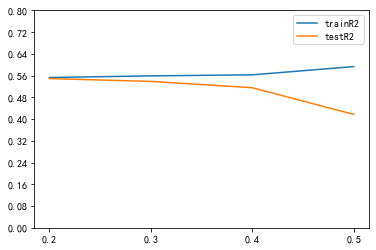

In [94]:
plt.plot(trainr2,label = 'trainR2')
plt.plot(testr2,label = 'testR2')
plt.xticks(ticks=[0,1,2,3],labels=[0.2,0.3,0.4,0.5])
plt.yticks(np.linspace(0,0.8,11))
plt.legend()
plt.show()

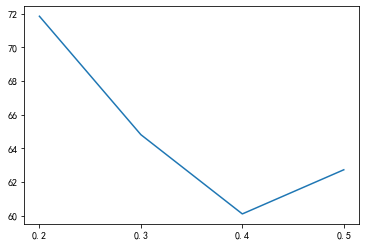

In [95]:
plt.plot(testRMSE)
plt.xticks(ticks=[0,1,2,3],labels=[0.2,0.3,0.4,0.5])
plt.show()

In [96]:
testRMSE

[71.85966742830828, 64.81359692409852, 60.09763706414232, 62.724550613997565]

In [97]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.4,random_state=0)

In [98]:
Ytrain = pd.DataFrame(Ytrain)
Ytest = pd.DataFrame(Ytest)

Ytrain.index = Xtrain.index
Ytest.index = Xtest.index

In [99]:
# 异常值处理

In [100]:
def AbnormalReplace(Xtrain,Xtest):
    #先对所有特征进行异常检测
    #对7日内付过费的用户，不处理
    #对7日内没付过费的用户，替换所有异常值为当前特征的中位数或者0
    
    Xtrain_ = Xtrain.copy()
    Xtest_ = Xtest.copy()
    for column in Xtrain_.columns:
        #提取当前要检测的列
        f_train = Xtrain_.loc[:,column]
        f_test = Xtest_.loc[:,column]
        
        #从训练集中计算QL、QU、IQR、中位数
        QL = np.quantile(f_train,0.25)
        QU = np.quantile(f_train,0.75)
        IQR = QU - QL
        medium_ = f_train.median()
        
        #对训练集和测试集同时进行检测，得到Ture/False列表
        errortrain = ((f_train < (QL-1.5*IQR)).astype(int) + (f_train > (QU+1.5*IQR)).astype(int)) != 0
        errortest = ((f_test < (QL-1.5*IQR)).astype(int) + (f_test > (QU+1.5*IQR)).astype(int)) != 0
        
        #将原矩阵中的异常值替换为中位数，主题排除7日付费用户
        #如果效果不够强烈，替换为0
        Xtrain_.loc[((Xtrain_['付费金额']==0).values & errortrain.values),column] = 0#medium_
        Xtest_.loc[((Xtest_['付费金额']==0).values & errortest.values),column] = 0#medium_
    
    return Xtrain_,Xtest_

In [101]:
xtrain,xtest = AbnormalReplace(Xtrain,Xtest)

In [102]:
# 归一化处理
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=[0,1])
mm = mm.fit(xtrain)

In [103]:
xtrain = mm.transform(xtrain)

In [104]:
xtest = mm.transform(xtest)

In [105]:
# 模型融合
# 氪金用户转化为1，不氪金用户转化为0
y2 = (y!=0).astype(int)

In [106]:
y2.value_counts()

0    2242019
1      45987
Name: 45日付费金额, dtype: int64

In [107]:
# 创造ytrain2和ytest2
# 以Xrain,Xtest的分割方式来分割y2，这样y2就是与Ytrain相匹配的
Ytrain2 = y2[Xtrain.index]

In [108]:
Ytest2 = y2[Xtest.index]

In [109]:
# 使用逻辑回归进行建模并使用ROC进行评估
from sklearn.linear_model import LogisticRegression as LogiR
from sklearn.metrics import roc_auc_score as ROC
from sklearn.metrics import recall_score as Recall#召回
from sklearn.metrics import precision_score as Precision

In [110]:
clf = LogiR(random_state=0)

In [111]:
clf.fit(xtrain,Ytrain2)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [112]:
clf.score(xtrain,Ytrain2)

0.997103735932978

In [113]:
clf.score(xtest,Ytest2)

0.9971164867248031

In [114]:
# 测试集的拟合情况
y2_proba = clf.predict_proba(xtest)#找出逻辑回归在测试集上对每个样本预测的概率
y2_proba[:,1]#提取出为1的概率

array([0.00592545, 0.00141073, 0.0014266 , ..., 0.00144772, 0.00340139,
       0.00241751])

In [115]:
ROC(Ytest2,y2_proba[:,1])

0.9688024253260042

In [116]:
Recall(Ytest2,clf.predict(xtest))

0.8564824885795084

In [117]:
Precision(Ytest2,clf.predict(xtest))

1.0

In [118]:
(y2_proba[:,1]>0.5).sum()

15749

In [119]:
(Ytest!=0).sum()

45日付费金额    18388
dtype: int64

In [120]:
# 找出模型之前预测的1类概率
prob = y2_proba[:,1]

In [121]:
#尝试更换阈值
(prob > 0.3).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
for tol in np.linspace(0,0.5,20):
    pred = (prob >= tol).astype(int)
    recall = Recall(Ytest2,pred)
    print("{:.3f}Recall:{:.3f}".format(tol,recall))

0.000Recall:1.000
0.026Recall:0.904
0.053Recall:0.879
0.079Recall:0.868
0.105Recall:0.866
0.132Recall:0.865
0.158Recall:0.864
0.184Recall:0.864
0.211Recall:0.863
0.237Recall:0.863
0.263Recall:0.863
0.289Recall:0.862
0.316Recall:0.861
0.342Recall:0.860
0.368Recall:0.860
0.395Recall:0.859
0.421Recall:0.859
0.447Recall:0.858
0.474Recall:0.857
0.500Recall:0.856


In [123]:
for tol in np.linspace(0,0.026,20):
    pred = (prob >= tol).astype(int)
    recall = Recall(Ytest2,pred)
    print("{:.3f}Recall:{:.3f}".format(tol,recall))

0.000Recall:1.000
0.001Recall:0.979
0.003Recall:0.953
0.004Recall:0.946
0.005Recall:0.940
0.007Recall:0.936
0.008Recall:0.931
0.010Recall:0.927
0.011Recall:0.923
0.012Recall:0.921
0.014Recall:0.919
0.015Recall:0.917
0.016Recall:0.915
0.018Recall:0.914
0.019Recall:0.912
0.021Recall:0.912
0.022Recall:0.911
0.023Recall:0.909
0.025Recall:0.906
0.026Recall:0.905


In [124]:
# 经过之后的RMSE判断，0.02是个比较合适的值
tol_=0.02
# 在0.02阈值下，逻辑回归预测了测试集中多少样本为1
(y2_proba[:,1]>=tol_).sum()

31522

In [125]:
#训练集中多少样本被预测为1
(clf.predict_proba(xtrain)[:,1]>=tol_).sum()

47392

In [126]:
# 对于所有不氪金的样本，预测到此结束——y=0
result = pd.DataFrame(y2_proba[:,1],index=Xtest.index)
result.columns = ['logi_proba']
result['logi_y_pred'] = (result['logi_proba']>=tol_).astype(int)

In [127]:
# 训练集，同样索引需要导入
logi_train_result = pd.DataFrame(clf.predict_proba(xtrain)[:,1],index=Xtrain.index)
logi_train_result.columns = ['logi_train_proba']
logi_train_result['logi_y_pred_train'] = (logi_train_result['logi_train_proba']>=tol_).astype(int)
logi_train_result.head()

,logi_train_proba,logi_y_pred_train
1914412,0.001,0
188838,0.001,0
1879427,0.001,0
1616849,0.002,0
2046255,0.002,0


In [128]:
# 选出应该放在线性回归中的训练集和测试集
# 训练集
xtrain_linear_reg = xtrain[logi_train_result['logi_y_pred_train'] == 1]
ytrain_linear_reg = Ytrain[logi_train_result['logi_y_pred_train'] == 1]

In [129]:
# 测试集
xtest_linear_reg = xtest[result['logi_y_pred'] == 1]
ytest_linear_reg = Ytest[result['logi_y_pred'] == 1]

In [130]:
# 开始回归预测
def reg_predict(model):
    reg = model.fit(xtrain_linear_reg,ytrain_linear_reg)
    y_linear_pred = reg.predict(xtest_linear_reg)#对测试集进行预测
    print('训练集R2:{:.3f}'.format(reg.score(xtrain_linear_reg,ytrain_linear_reg)))
    print('测试集R2:{:.3f}'.format(reg.score(xtest_linear_reg,ytest_linear_reg)))
    print('测试集RMSE:{:.3f}'.format(np.sqrt(MSE(ytest_linear_reg,y_linear_pred))))
    return y_linear_pred #融合模型测试出结果中的回归部分

In [131]:
#线性回归
reg0 = LR()
y_linear_pred0 = reg_predict(reg0)

训练集R2:0.573
测试集R2:0.545
测试集RMSE:310.519


In [132]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [133]:
reg1 = RFR(n_estimators=100,max_depth=2,max_features=20,random_state=1412)
reg2 = GBR(n_estimators=100,max_depth=2,max_features=20,random_state=1412) 

In [134]:
y_linear_pred1 = reg_predict(reg1)

<ipython-input-130-6386219ef9c2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = model.fit(xtrain_linear_reg,ytrain_linear_reg)


训练集R2:0.500
测试集R2:0.471
测试集RMSE:334.599


In [135]:
y_linear_pred2 = reg_predict(reg2)

D:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集R2:0.720
测试集R2:0.562
测试集RMSE:304.471


In [277]:
reg2 = GBR(n_estimators= 330,max_depth=2,random_state=1412,learning_rate=0.05,max_features=50,min_samples_split=15)
y_linear_pred2 = reg_predict(reg2)

D:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集R2:0.765
测试集R2:0.595
测试集RMSE:292.988


In [278]:
# 将GBDT与逻辑回归的预测值合并
# 创建新列，全部为0
result['reg_result'] = 0

In [279]:
# 将逻辑回归的预测标签为1的样本提出来，对所有这些样本的'reg_result'回归结果列填入回归预测结果y_linear_pred2
result.loc[result['logi_y_pred'] == 1,'reg_result'] = y_linear_pred2

In [280]:
result.head()

,logi_proba,logi_y_pred,reg_result
660869,0.006,0,0.000
1002543,0.001,0,0.000
2275758,0.001,0,0.000
961802,0.001,0,0.000
793236,0.004,0,0.000


In [281]:
# 确认索引一致
Ytest.head()

,45日付费金额
660869,0.000
1002543,0.000
2275758,0.000
961802,0.000
793236,0.000


In [282]:
np.sqrt(MSE(Ytest,result['reg_result']))

55.15942698309719

In [283]:
FeatureImportance = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(reg2.feature_importances_)],axis=1)

In [284]:
A = FeatureImportance.sort_values(0,ascending=False)
B = A[A[0]>0.005]

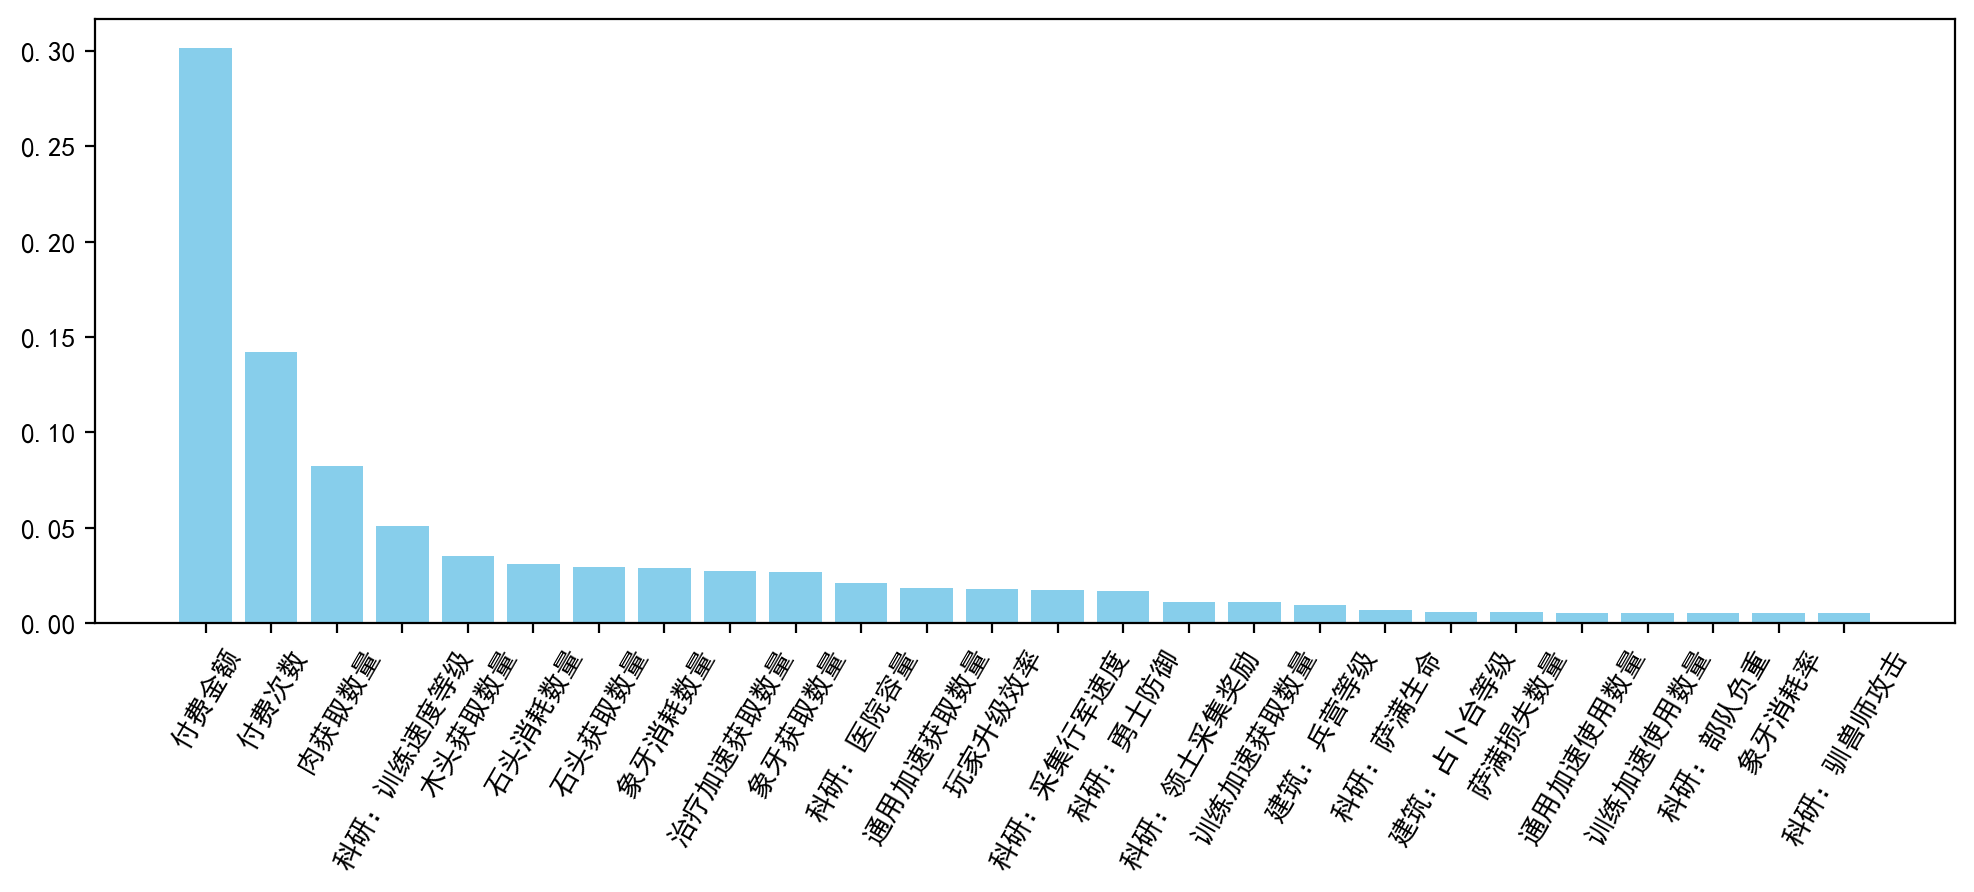

In [285]:
plt.figure(figsize=(12,4), dpi=200)
plt.bar(B['字段解释'],B[0],color='skyblue')
plt.xticks(rotation=60)
plt.show()